In [39]:
import os
os.getcwd()
os.chdir('lexicon')

'C:\\Users\\tehya\\OneDrive\\Desktop\\lexicon'

In [48]:
# defining punctuation stripping function
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@', '\n']

def strip_punctuation(word):
    for letter in word:
        if letter in punctuation_chars:
            word = word.replace(letter, '')
    return word

In [49]:
# lists of positive words and negative words to use
# lexicon provided by: https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())

negative_words = []
with open("negative_words.txt") as neg_f:
    for lin in neg_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

In [50]:
# Function to detect positive word or negative word from tweets
def get_pos(sent):
    ctr = 0
    word_lst = sent.split()
    for word in word_lst:
        p_word = strip_punctuation(word).lower()
        if p_word in positive_words:
            ctr = ctr + 1
    return ctr

def get_neg(sent):
    ctr = 0
    word_lst = sent.split()
    for word in word_lst:
        n_word = strip_punctuation(word).lower()
        if n_word in negative_words:
            ctr = ctr + 1
    return ctr

In [51]:
# pseudo tweets file provided by University of Michigan instructor in Coursera
# each line consist of: tweet, retweet count, reply count
# net score for each tweet is calculated by getting difference between positive score and negative score
with open('project_twitter_data.csv', 'r') as tweet:
    tweet.readline()
    for line in tweet:
        tw = line.split(',')
        outfile.write("{}, {}, {}, {}, {}".format(tw[1], strip_punctuation(tw[2]), 
                                                  get_pos(tw[0]), get_neg(tw[0]), (get_pos(tw[0])-get_neg(tw[0]))))  
        outfile.write("\n")

In [52]:
# exporting result
outfile = open("resulting_data.csv", "w")
outfile.write('Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score')
outfile.write('\n')

1

In [53]:
# generate scatter plot for results
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("resulting_data.csv")
df.columns = df.columns.str.strip()
df.columns

Index(['Number of Retweets', 'Number of Replies', 'Positive Score',
       'Negative Score', 'Net Score'],
      dtype='object')

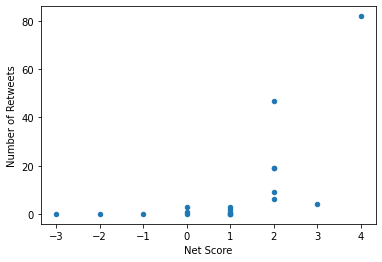

In [54]:
df.plot(kind='scatter', x = 'Net Score', y = 'Number of Retweets')